In [0]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [0]:
!git clone https://gitlab.com/srirammandhati/rice-weed-segment.git

fatal: destination path 'rice-weed-segment' already exists and is not an empty directory.


In [0]:
import datetime
import json
import os
import re
import fnmatch
from PIL import Image
import numpy as np

In [0]:
def filter_for_jpeg(root, files):
    file_types = ['*.jpeg', '*.jpg', '*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    
    return files

In [0]:

def filter_for_annotations(root, files, image_filename):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    basename_no_extension = os.path.splitext(os.path.basename(image_filename))[0]
    print(basename_no_extension)
    file_name_prefix = basename_no_extension + '.*'
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    files = [f for f in files if re.match(file_name_prefix, os.path.splitext(os.path.basename(f))[0])]

    return files

In [0]:
IMAGE_DIR="/content/rice-weed-segment/train/image"
ANNOTATION_DIR="/content/rice-weed-segment/train/PixelLabelData"

for root, _, files in os.walk(ANNOTATION_DIR):
    image_files = filter_for_jpeg(root, files)
    print(image_files)

# go through each image
for image_filename in image_files:
    print("looking into"+str(image_filename))
    image = Image.open(image_filename)
    print(image.size)



In [0]:
#image=image.convert("RGBA")
print(np.asarray(image))
data = image.getdata()
#<PIL.PngImagePlugin.PngImageFile image mode=L size=912x1024 at 0x7FBFC4904FD0>

image1000=Image.open("1000_square_0.png")
print(np.asarray(image1000))

In [0]:
def color_separator(im):
    if im.getpalette():
        im = im.convert('RGB')

    colors = im.getcolors()
    print(str(colors)+" found!!")
    width, height = im.size
    colors_dict = dict((val[1],Image.new('RGB', (width, height), (0,0,0))) 
                        for val in colors)
    pix = im.load()    
    for i in range(width):
        for j in range(height):
            colors_dict[pix[i,j]].putpixel((i,j), pix[i,j])
    return colors_dict

In [0]:
im = Image.open(ANNOTATION_DIR+"/Label_101.png")
colors_dict = color_separator(im)
print(np.asarray(colors_dict[3]))

[255 255 255]


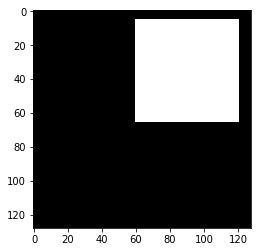

In [0]:
img = cv2.imread('/content/1000_square_0.png')
print(img[64][64])
plt.imshow(img)
plt.show()

(1024, 912, 3)


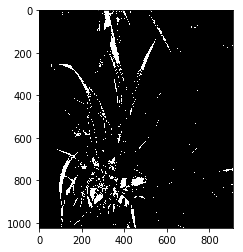

In [0]:
img = cv2.imread(ANNOTATION_DIR+"/Label_101.png") # get image
print(img.shape)

for i in range(img.shape[0]): # for every pixel:
    for j in range(img.shape[1]):
        if img[i,j][0] == 0: # if not black:
            img[i,j] = [255, 255, 255] # change to white
        elif img[i,j][0] != 0: # if not black:
            img[i,j] = [0, 0, 0] # change to white
plt.imshow(img)
plt.show()

TypeError: ignored

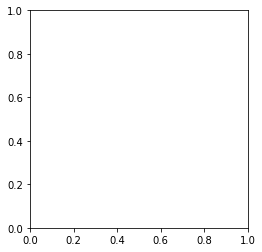

In [0]:
img = cv2.imread(IMAGE_DIR+"/image_102.png")
plt.imshow(img)
plt.show()

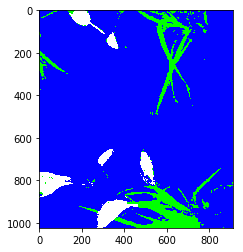

In [0]:
img = cv2.imread(ANNOTATION_DIR+"/Label_102.png")

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j][0] == 0: #shade
      img[i][j][1] = 255
    if img[i][j][0] == 1: #rice
      img[i][j][1] = 255
    if img[i][j][0] == 2: #soil
      img[i][j][2] = 255  
    if img[i][j][0] == 3: #weed
      img[i][j][0] = 255
      img[i][j][1] = 255
      img[i][j][2] = 255

plt.imshow(img)
plt.show()

[161 164 162]


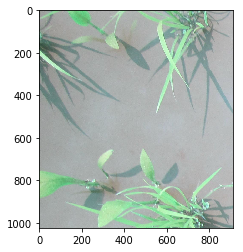

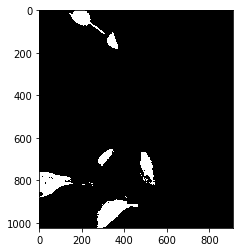

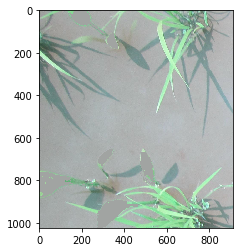

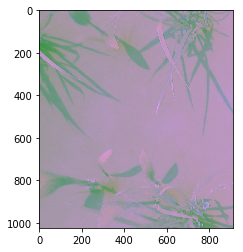

In [0]:
mask_dir="/content/rice-weed-segment/train/masks"
imga = cv2.imread(IMAGE_DIR+"/image_102.jpg")
imgl= cv2.imread(mask_dir+"/image_102_weed.png")

print(imga[200][200])


cv2.imwrite("riceweed-original.png", imga)
plt.imshow(imga)
plt.show()

cv2.imwrite("riceweed-mask.png", imgl)
plt.imshow(imgl)
plt.show()

for i in range(imga.shape[0]):
  for j in range(imga.shape[1]):
    if imgl[i][j][0] == 255: #shade
      imga[i][j][0] = 161
      imga[i][j][1] = 164
      imga[i][j][2] = 162

cv2.imwrite("riceeweed-masked.png", imga)
plt.imshow(imga)
plt.show()



imga = cv2.imread(IMAGE_DIR+"/image_102.jpg")  
for i in range(imga.shape[0]):
  for j in range(imga.shape[1]):
      imga[i][j][1] = 150

cv2.imwrite("riceweed-ndvi.png", imga)
plt.imshow(imga)
plt.show()      


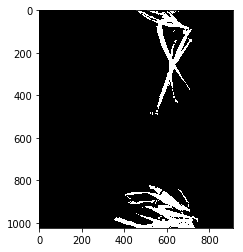

In [0]:
img = cv2.imread(ANNOTATION_DIR+"/Label_102.png")

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j][0] == 1: #rice
      img[i][j][0] = 255
      img[i][j][1] = 255
      img[i][j][2] = 255
    else :
      img[i][j][0] = 0
      img[i][j][1] = 0
      img[i][j][2] = 0

plt.imshow(img)
plt.show()

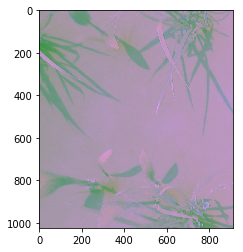

In [0]:

imga = cv2.imread(IMAGE_DIR+"/image_102.jpg")  
for i in range(imga.shape[0]):
  for j in range(imga.shape[1]):
      imga[i][j][1] = 150

cv2.imwrite("riceweed-ndvi.png", imga)
plt.imshow(imga)
plt.show()      


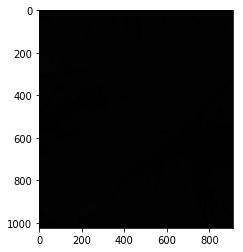

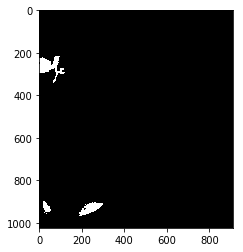

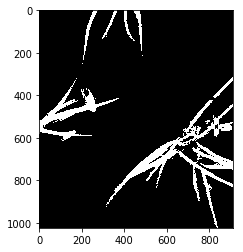

In [0]:
img = cv2.imread(ANNOTATION_DIR+"/Label_103.png")
img1 = cv2.imread(ANNOTATION_DIR+"/Label_103.png")
img2 = cv2.imread(ANNOTATION_DIR+"/Label_103.png")


for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j][0] == 3: #weed
      img1[i][j][0] = 255
      img1[i][j][1] = 255
      img1[i][j][2] = 255
    else :
      img1[i][j][0] = 0
      img1[i][j][1] = 0
      img1[i][j][2] = 0
      
    if img[i][j][0] == 1: #rice
      img2[i][j][0] = 255
      img2[i][j][1] = 255
      img2[i][j][2] = 255
    else :
      img2[i][j][0] = 0
      img2[i][j][1] = 0
      img2[i][j][2] = 0 

plt.imshow(img)
plt.show()

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()


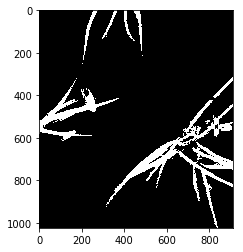

In [0]:
img = cv2.imread(ANNOTATION_DIR+"/Label_103.png")

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j][0] == 1: #rice
      img[i][j][0] = 255
      img[i][j][1] = 255
      img[i][j][2] = 255
    else :
      img[i][j][0] = 0
      img[i][j][1] = 0
      img[i][j][2] = 0

plt.imshow(img)
plt.show()

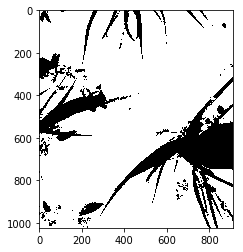

In [0]:
img = cv2.imread(ANNOTATION_DIR+"/Label_103.png")

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j][2] == 2: #soil
      img[i][j][0] = 255
      img[i][j][1] = 255
      img[i][j][2] = 255
    else :
      img[i][j][0] = 0
      img[i][j][1] = 0
      img[i][j][2] = 0

plt.imshow(img)
plt.show()

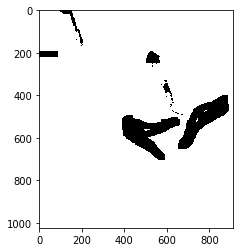

[0 0 0]


In [0]:
imgg = cv2.imread("/content/rice-weed-segment/train/masks/image_1_weed.png")
plt.imshow(imgg)
plt.show()
print(imgg[550][450])

In [0]:
!rm -rf /content/rice-weed-segment/test/masks
!mkdir /content/rice-weed-segment/test/masks

In [0]:
#drive_dir = "/content/drive/My\Drive/DeepGo/rice-seedling-and-weed/train/PixelLabelData"
loc_path = "/content/rice-weed-segment/test/PixelLabelData"
for root, _, files in os.walk(loc_path):
    image_files = filter_for_jpeg(root, files)
    print(image_files)

# go through each image
for image_filename in image_files:
    print("looking into"+str(image_filename))
    
    img = cv2.imread(image_filename)
    img1 = cv2.imread(image_filename)
    img2 = cv2.imread(image_filename)

    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if img[i][j][0] == 3: #weed
          img1[i][j][0] = 255
          img1[i][j][1] = 255
          img1[i][j][2] = 255
        else :
          img1[i][j][0] = 0
          img1[i][j][1] = 0
          img1[i][j][2] = 0

        if img[i][j][0] == 1: #rice
          img2[i][j][0] = 255
          img2[i][j][1] = 255
          img2[i][j][2] = 255
        else :
          img2[i][j][0] = 0
          img2[i][j][1] = 0
          img2[i][j][2] = 0 
    
   
    print("writing weed")          
    cv2.imwrite("/content/rice-weed-segment/test/masks/image_"+image_filename[53:-4]+"_weed.png", img1)  
    print("writing weed")          
    cv2.imwrite("/content/rice-weed-segment/test/masks/image_"+image_filename[53:-4]+"_rice.png", img2)    

['/content/rice-weed-segment/test/PixelLabelData/Label_199.png', '/content/rice-weed-segment/test/PixelLabelData/Label_182.png', '/content/rice-weed-segment/test/PixelLabelData/Label_220.png', '/content/rice-weed-segment/test/PixelLabelData/Label_204.png', '/content/rice-weed-segment/test/PixelLabelData/Label_190.png', '/content/rice-weed-segment/test/PixelLabelData/Label_179.png', '/content/rice-weed-segment/test/PixelLabelData/Label_212.png', '/content/rice-weed-segment/test/PixelLabelData/Label_207.png', '/content/rice-weed-segment/test/PixelLabelData/Label_209.png', '/content/rice-weed-segment/test/PixelLabelData/Label_215.png', '/content/rice-weed-segment/test/PixelLabelData/Label_205.png', '/content/rice-weed-segment/test/PixelLabelData/Label_224.png', '/content/rice-weed-segment/test/PixelLabelData/Label_196.png', '/content/rice-weed-segment/test/PixelLabelData/Label_178.png', '/content/rice-weed-segment/test/PixelLabelData/Label_223.png', '/content/rice-weed-segment/test/PixelL

In [0]:
print(image_filename[53:-4])

181


In [0]:
#drive_dir = "/content/drive/My\Drive/DeepGo/rice-seedling-and-weed/train/PixelLabelData"


In [0]:
img = cv2.imread("inputs/hist.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
colors = np.where(hist>5000)
img_number = 0
for color in colors[0]:
    print(color)
    split_image = img.copy()
    split_image[np.where(gray != color)] = 0
    cv2.imwrite(str(img_number)+".jpg",split_image)
    img_number+=1
plt.hist(gray.ravel(),256,[0,256])
plt.savefig('plt')
plt.show()

In [0]:
!cp -r  /content/rice-weed-segment "/content/drive/My Drive/ThesisGo/"

In [0]:
# List available datasets.
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
new-york-state/nys-environmental-remediation-sites          NYS Environmental Remediation Sites                   5MB  2019-08-12 08:11:48           2415  
new-york-city/new-york-city-current-job-postings            New York City Current Job Postings                    3MB  2019-08-11 22:05:11           6732  
eliasdabbas/search-engine-results-flights-tickets-keywords  Search Engine Results - Flights & Tickets Keywords   22MB  2019-08-01 11:51:13           1779  
google/google-landmarks-dataset                             Google-Landmarks Dataset                            107MB  2019-08-12 12:00:26          11054  
AnalyzeBoston/crimes-in-boston                              Crim